In [58]:
#import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [59]:
# Load dataset
df = pd.read_csv('BigMart_Data_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
#EDA
df.shape

(8523, 12)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [62]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [63]:
#fetch object dtype cols
cat_col = [col for col in df.columns if df[col].dtype=='O']
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

 **Found 7 object type cols**

In [64]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [65]:
#Fetch number cols
num_col = [col for col in df.columns if df[col].dtype!='O']
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

#### found 5 num cols

In [66]:
#missing value ratio used for dimensionality reduction:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### found many missing values in item_weight and outlet_size col

In [67]:
# Handling missing values:
df['Item_Weight'].mean()

12.857645184135976

In [68]:
# imputing missing records with stats
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
# since outlet_size is categorical we use mode instead of mean,median
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [69]:
#checking missing recs again
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##### Observation:
No missing records present 

In [70]:
# Now,convert the object dtypes to numerical using labelencoder
le=LabelEncoder()
cols = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cols:
    df[col] = le.fit_transform(df[col])

In [71]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228


In [72]:
# Split the data into Xand Y
X=df.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y = df['Item_Outlet_Sales']

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [74]:
X_train,X_test,y_train,y_test

(      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
 549         9.500                 2         0.035206          6  171.3448   
 7757       18.000                 1         0.047473          9  170.5422   
 764        17.600                 2         0.076122         10  111.7202   
 6867        8.325                 1         0.029845          6   41.6138   
 2716       12.850                 1         0.137228         13  155.5630   
 ...           ...               ...              ...        ...       ...   
 5734        9.395                 2         0.286345          6  139.1838   
 5191       15.600                 1         0.117575          5   75.6670   
 5390       17.600                 1         0.018944          8  237.3590   
 860        20.350                 3         0.054363         13  117.9466   
 7270       16.350                 0         0.016993          9   95.7410   
 
       Outlet_Identifier  Outlet_Establishment_Year  Outlet_Si

In [75]:
# Model building:
#create,fit-transform,test-predict with actual data
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [76]:
y_pred

array([1098.5737742 ,  615.94943655, 1095.10395306, ...,  527.59255425,
       1134.45749755, 1762.6077425 ])

In [77]:
# Metrics
print('R2 score:',r2_score(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score: 0.524892631324779
RMSE: 1136.3659650342781


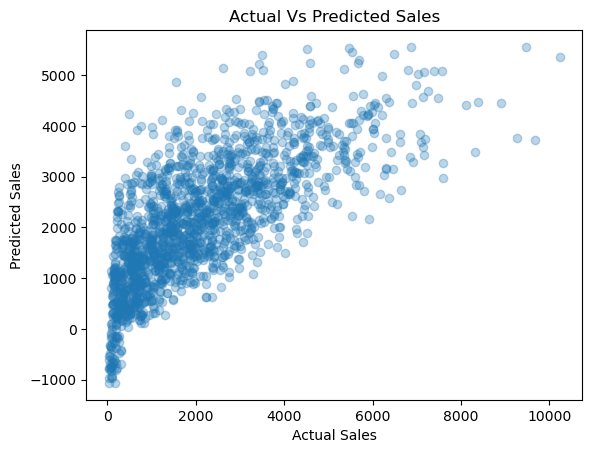

In [78]:
plt.scatter(y_test,y_pred, alpha=0.3)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Vs Predicted Sales")
plt.show()

In [79]:
# RandomForest
model = RandomForestRegressor(random_state=1,max_depth=10)
model.fit(X,y)

RandomForestRegressor(max_depth=10, random_state=1)

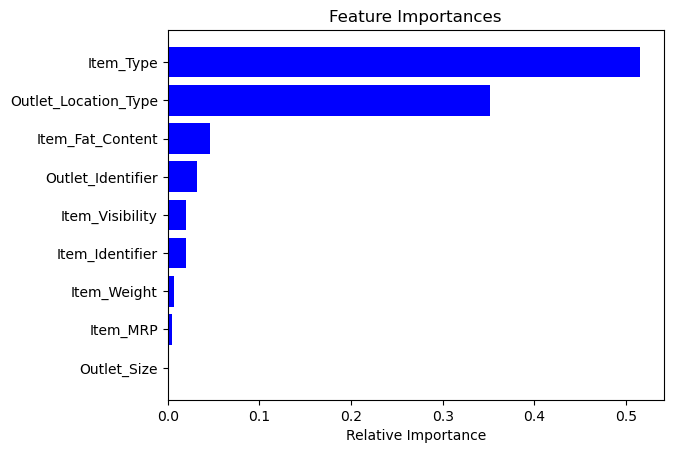

In [80]:
# After fitting model,plot the feature importance graph:
features = df.columns
importants = model.feature_importances_
indices = np.argsort(importants)[-9:] #top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importants[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observation:
Based on above graph, we can hand pick the top most features to reduce the dimensionality in our dataset.